In [3]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


4422102/4422102 [==============================] - 1s 0us/step


In [5]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255


# **Modelo Básico**

Este modelo, es igual que el que hemos utilizado para la clasificación de números escritos a mano.
>
Es decir definimos una capa convolucional con 32 filtros y ventana 5x5 y maxpooling con ventana de 2x2
>
Definimos otra capa convolucional con 64 filtros y ventana 5x5 y un maxpooling con ventana de 2x2.
>
La función softmax necesita el vector 1D, por ello usamos una capa Flatten para conveerir el vector 2D a 1D.


In [6]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
model=Sequential()
model.add(Conv2D(32,(5,5), activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation = 'softmax'))

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 16s 4ms/step - loss: 0.7542 - accuracy: 0.7329
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4866 - accuracy: 0.8262
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4310 - accuracy: 0.8476
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3966 - accuracy: 0.8585
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3904 - accuracy: 0.8602
Test accuracy: 0.8601999878883362


In [7]:
predictions = model.predict(test_images)


313/313 [==============================] - 1s 2ms/step


In [8]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#00FF00")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')

In [9]:
#Las capas convolucionales se esperan un vector de esta forma
train_images = train_images.reshape((60000, 28, 28))
test_images = test_images.reshape((10000, 28, 28))

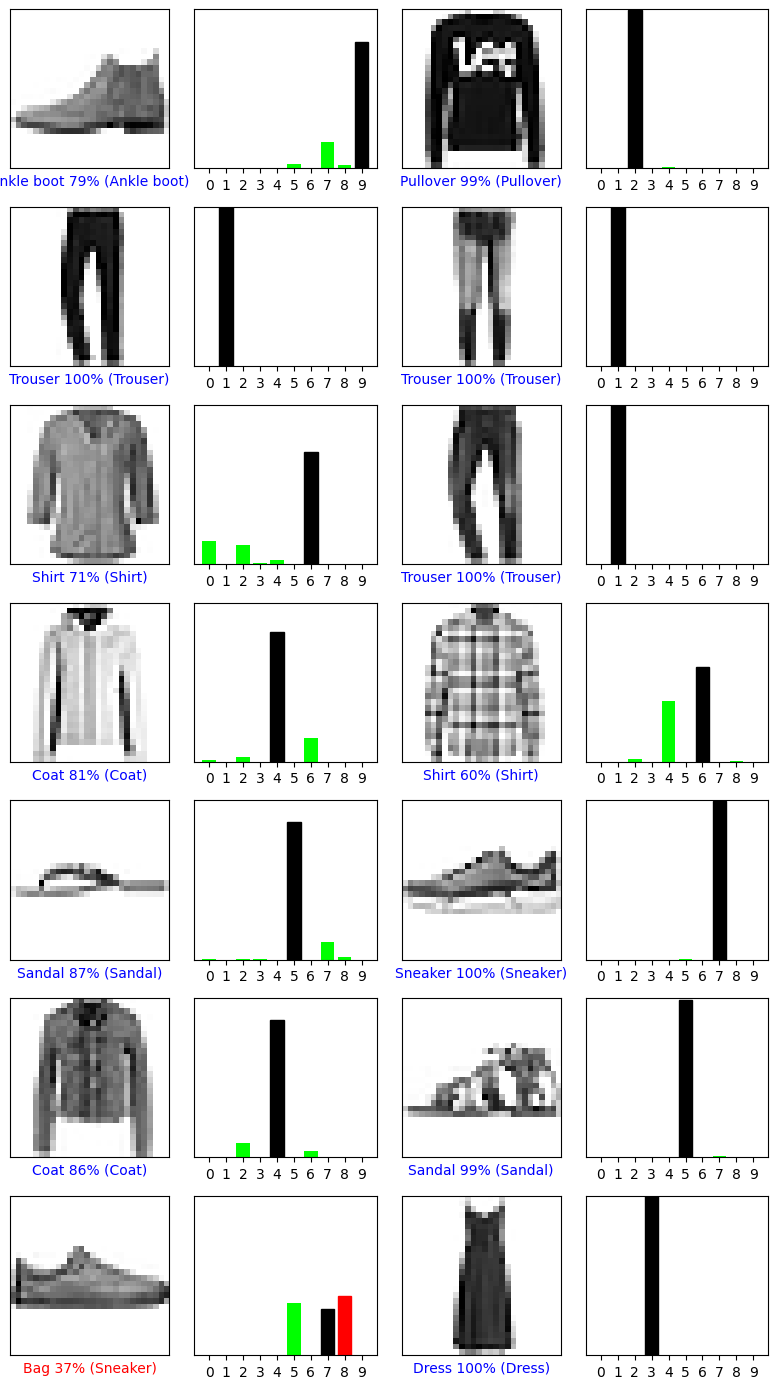

In [10]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


# **Mejoras : Optimizador**
Vamos a realizar un cambio en los hiperapametros,en concreto en el optimizador, para ver el impacto que este tine en nuestro modelo.
>
Recordemos que el optimizador era el encargado de propagar el error cometido a las neuronas para ajustar los parámetros,en el anterior usamos el descenso de gradiente estocastico, pero en lugar de ir muestra a muestra, dividiamos la entrada en lotes y procesabamos esos lotes.


In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('Test accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3696 - accuracy: 0.8675
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2879 - accuracy: 0.8967
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2529 - accuracy: 0.9094
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2270 - accuracy: 0.9163
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.2755 - accuracy: 0.8993
Test accuracy: 0.8992999792098999


In [12]:
predictions = model.predict(test_images)


313/313 [==============================] - 1s 2ms/step


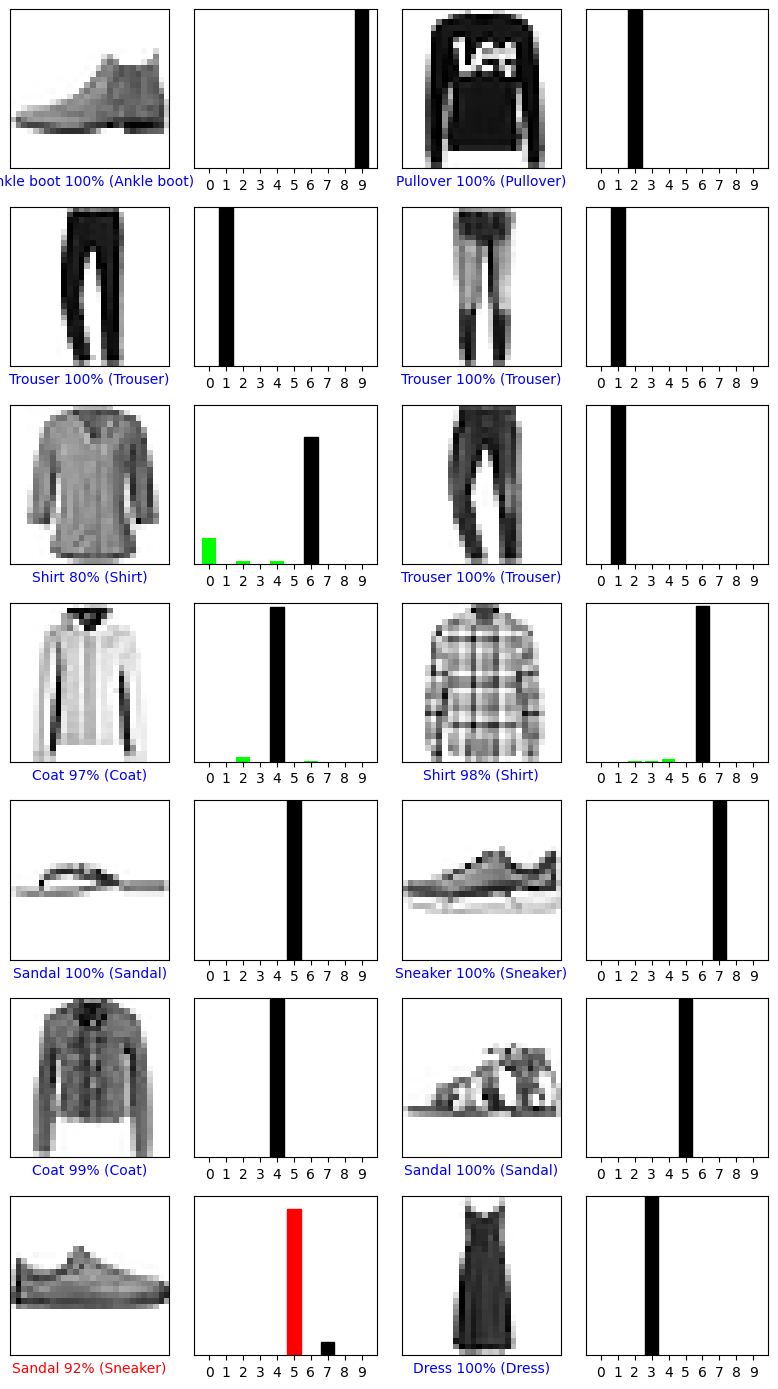

In [13]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# **Capas de Dropout y BatchNormalization**


*   BatchNormalization : La idea es normalizar las entradas de la capa de tal manera que tengan una activación de salida media de cero y una desviación estándar de uno
*   Dropout : Tiene como objetivo mitigar el sobreajuste,la técnica se basa en ignorar ciertos conjuntos de neuronas de la red durante el entrenamiento de manera aleatorio, por ignorar nos referimos a que estas neuornas no se consideran durante una iteración concreta del proceso de aprendizaje.



In [14]:
from tensorflow.keras.layers import Dropout, BatchNormalization


def make_model():
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', input_shape=(28,28,1)))
  model.add(BatchNormalization())

  model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  return model


In [15]:

model = make_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images,  test_labels)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 24s 10ms/step - loss: 0.5086 - accuracy: 0.8251
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3206 - accuracy: 0.8865
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2774 - accuracy: 0.9014
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2500 - accuracy: 0.9129
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.2234 - accuracy: 0.9198

Test accuracy: 0.9197999835014343


In [17]:
predictions = model.predict(test_images)


313/313 [==============================] - 1s 3ms/step


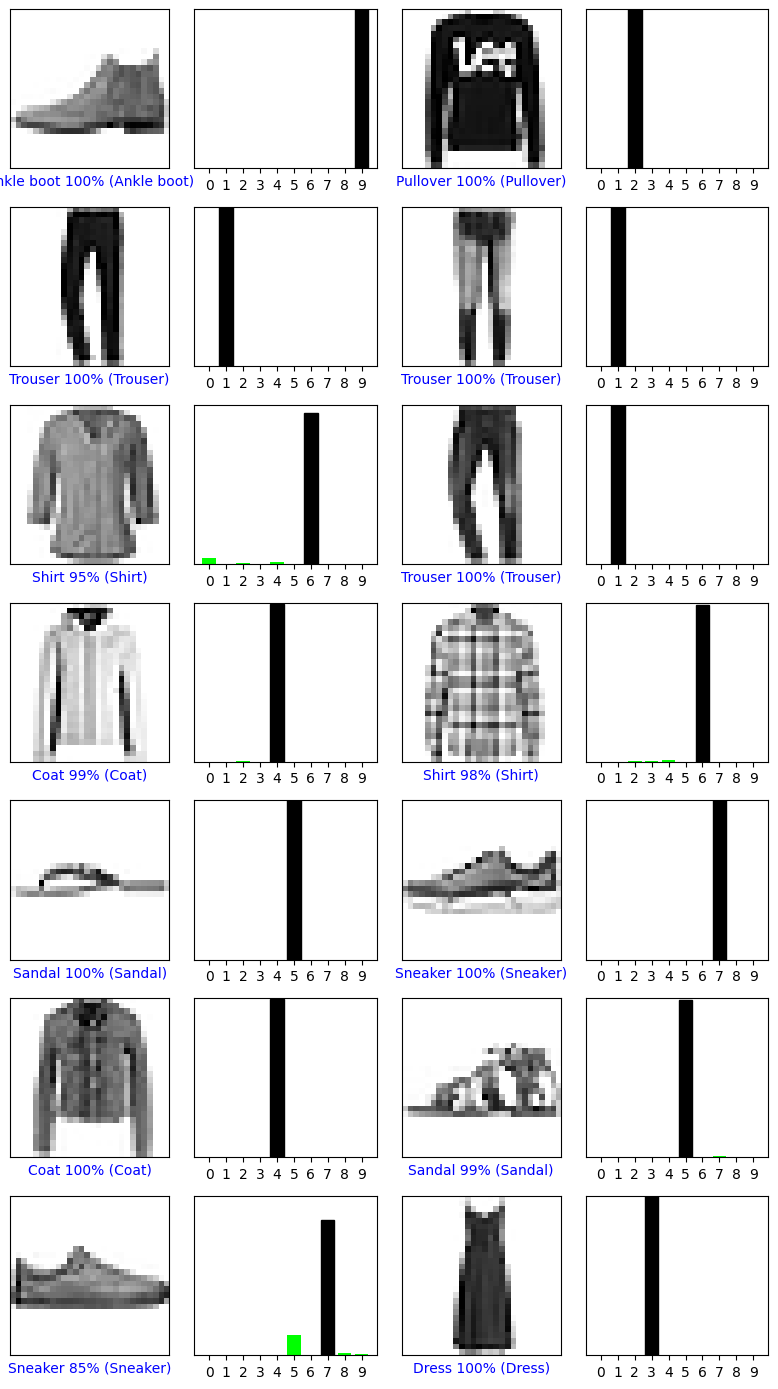

In [18]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# **Ratio de aprendizaje**
Recordemos, la importancia de la tasa de aprendizaje, esta no debe ser ni demasiado grande,porque damos pasos muy grande y puede hacer que nunca lleguemos al mínimo global, ni tiene que ser demasiado pequeño, sinó el proceso es demasiado lento y puede alterar los pesos y el sesgo.
>
Lo ideal es que la tasa de aprendizaje(learing rate) vaya disminuyendo a medida que avanza el entrenamiento, esto lo podemos conseguir usando el callback LearningRateScheduler

In [19]:

model = make_model()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=30)
test_loss, test_acc = model.evaluate(test_images,  test_labels)

print('\nTest accuracy:', test_acc)

Epoch 1/30
1875/1875 [==============================] - 23s 10ms/step - loss: 0.4952 - accuracy: 0.8311
Epoch 2/30
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3214 - accuracy: 0.8886
Epoch 3/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2767 - accuracy: 0.9029
Epoch 4/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2466 - accuracy: 0.9131
Epoch 5/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2228 - accuracy: 0.9208
Epoch 6/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2046 - accuracy: 0.9277
Epoch 7/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1851 - accuracy: 0.9339
Epoch 8/30
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1722 - accuracy: 0.9386
Epoch 9/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1581 - accuracy: 0.9436
Epoch 10/30
1875/1875 [==============================] - 19s 10m

In [21]:
predictions = model.predict(test_images)


313/313 [==============================] - 1s 3ms/step


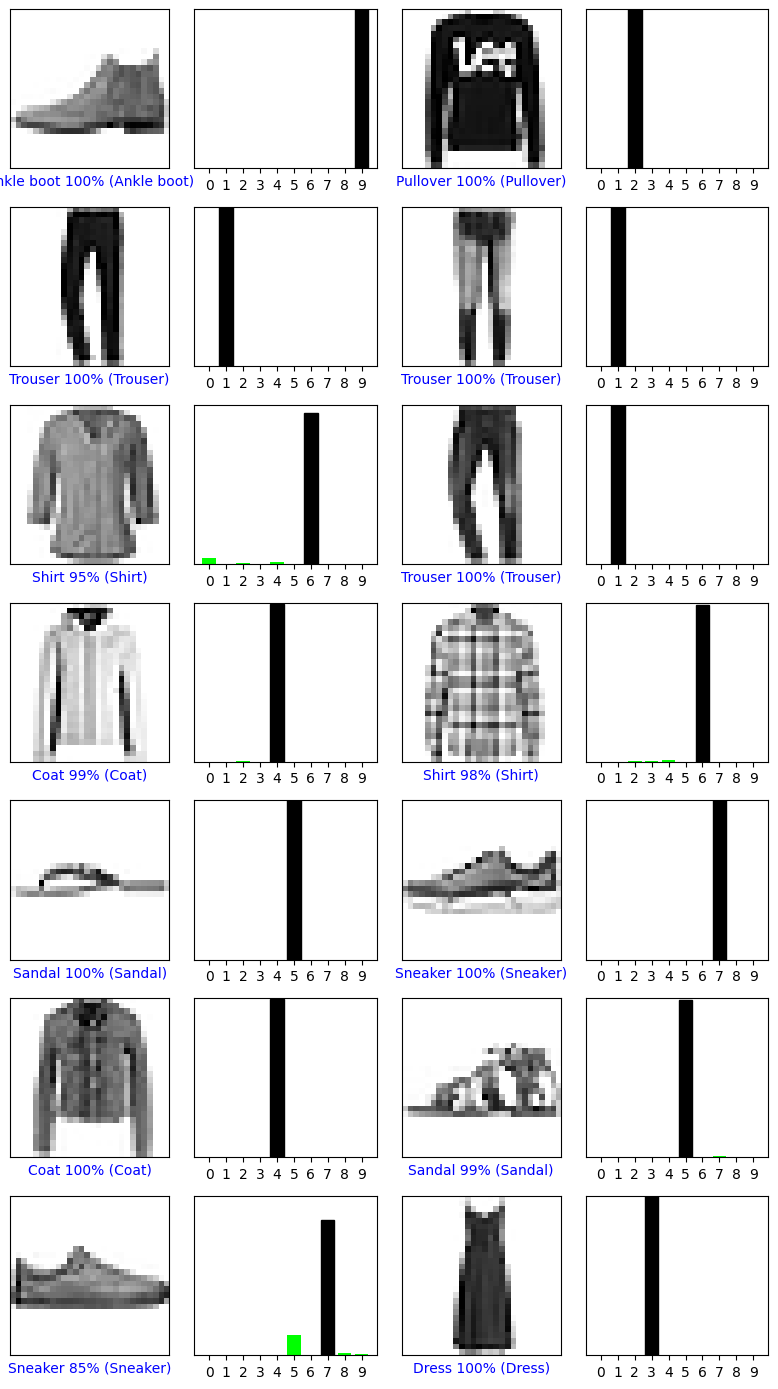

In [20]:
num_rows = 7
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()